In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import ast

def calculate_weighted_average(file_path, keywords_data, current_year):
    books_data = pd.read_excel(file_path)
    keywords_data[current_year] = 0  # Initialize the current year column

    for index, keyword_row in keywords_data.iterrows():
        keyword_list = ast.literal_eval(keyword_row['키워드'])
        total_weighted_value = 0
        total_loan_counts = 0

        # Iterate through each book for a specific keyword
        for _, row in books_data.iterrows():
            book_title = row['서명'].lower()
            publication_year_str = row['출판년도']
            loan_count = row['대출건수']

            # Extract the first sequence of digits as the publication year
            publication_year_match = re.search(r'\d+', publication_year_str)
            if publication_year_match:
                publication_year = int(publication_year_match.group())
            else:
                continue  # Skip if no valid year found

            # Check if any keyword is in the book title using regular expression
            if any(re.search(r'\b' + re.escape(keyword.lower()) + r'\b', book_title) for keyword in keyword_list):
                total_weighted_value += (current_year - publication_year) * loan_count
                total_loan_counts += loan_count

        # Calculate the weighted average for each keyword after all books have been checked
        average_weighted_value = total_weighted_value / total_loan_counts if total_loan_counts > 0 else 0
        keywords_data.at[index, str(current_year)] = average_weighted_value


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and direc

In [ ]:
years = range(2018, 2024)  # 연도 범위
months = range(1, 11)  # 월 범위

keyword_df = pd.read_excel("/content/drive/MyDrive/대출 데이터 모음/당해년도-출판년도 폴더/최신 데이터 민감도.xlsx")

# 각 연도별 데이터 폴더를 순회
base_path = '/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/'
for year in years:
    year_folder_path = os.path.join(base_path, str(year))
    if os.path.exists(year_folder_path):
        for month in months:
            file_name = f"{year}_{month}_keyword_processed.xlsx"
            file_path = os.path.join(year_folder_path, file_name)
            if os.path.exists(file_path):
                # filtering_datarow(file_path, year, month)
                print('DEBUG'+file_path)
                print(calculate_weighted_average(file_path, keyword_df, year))

            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Year folder not found: {year_folder_path}")

keyword_df.to_excel("/content/drive/MyDrive/대출 데이터 모음/당해년도-출판년도 폴더/최신 데이터 민감도_결과.xlsx")

DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_1_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_2_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_3_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_4_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_5_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_6_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_7_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_8_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_9_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2018/2018_10_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2019/2019_1_keyword_processed.xlsx
None
DEBUG/content/drive/MyDrive/대출 

In [ ]:
keyword_df

,index,키워드,2018,2019,2020,2021,2022,2023,2018,2019,2020,2021,2022,2023
0,0.0,"['JPA','ORM']",0,0,0,0,0,0,3.0,4.0,2.5,3.230769,4.446809,5.5
1,NaN,['JDBC'],0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,NaN,['mvc'],0,0,0,0,0,0,4.0,5.0,0.0,7.000000,0.000000,0.0
3,NaN,['security'],0,0,0,0,0,0,0.0,0.0,0.0,1.000000,2.000000,3.0
4,NaN,[' HATEOAS'],0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0


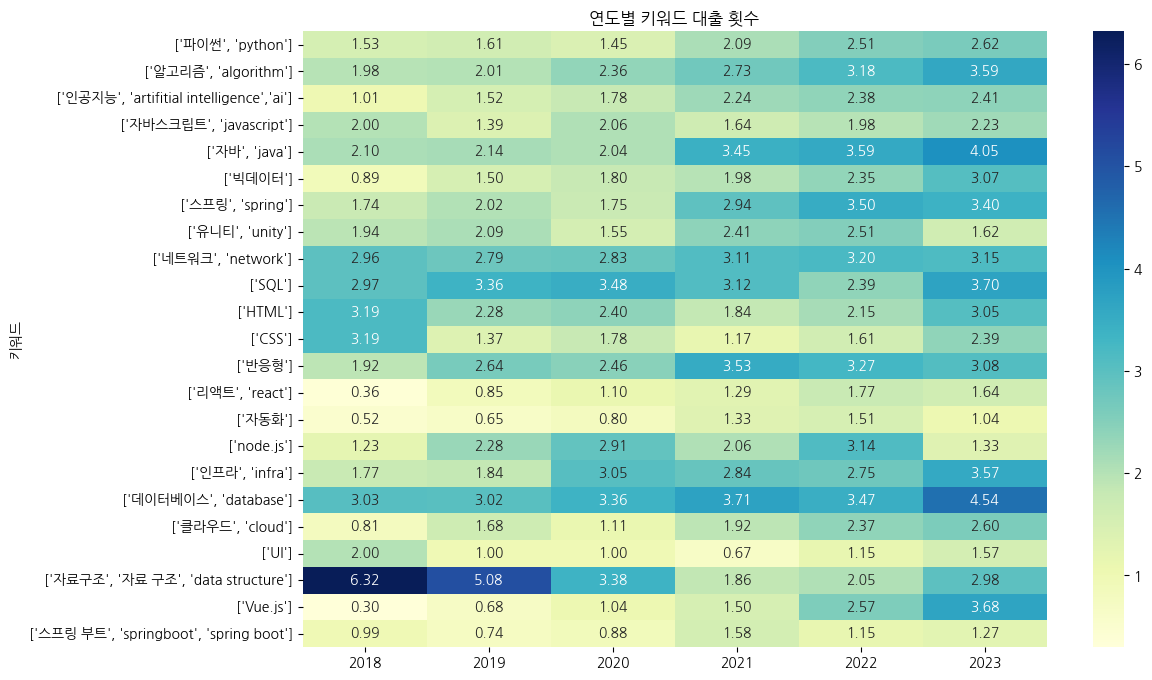

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
file_path = "/content/drive/MyDrive/대출 데이터 모음/당해년도-출판년도 폴더/최신 데이터 민감도_결과_1~24.xlsx"
df = pd.read_excel(file_path, index_col="키워드")

plt.figure(figsize=(12, 8))
# vmax 값을 설정하여 범위를 조정함
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('연도별 키워드 대출 횟수')
plt.show()

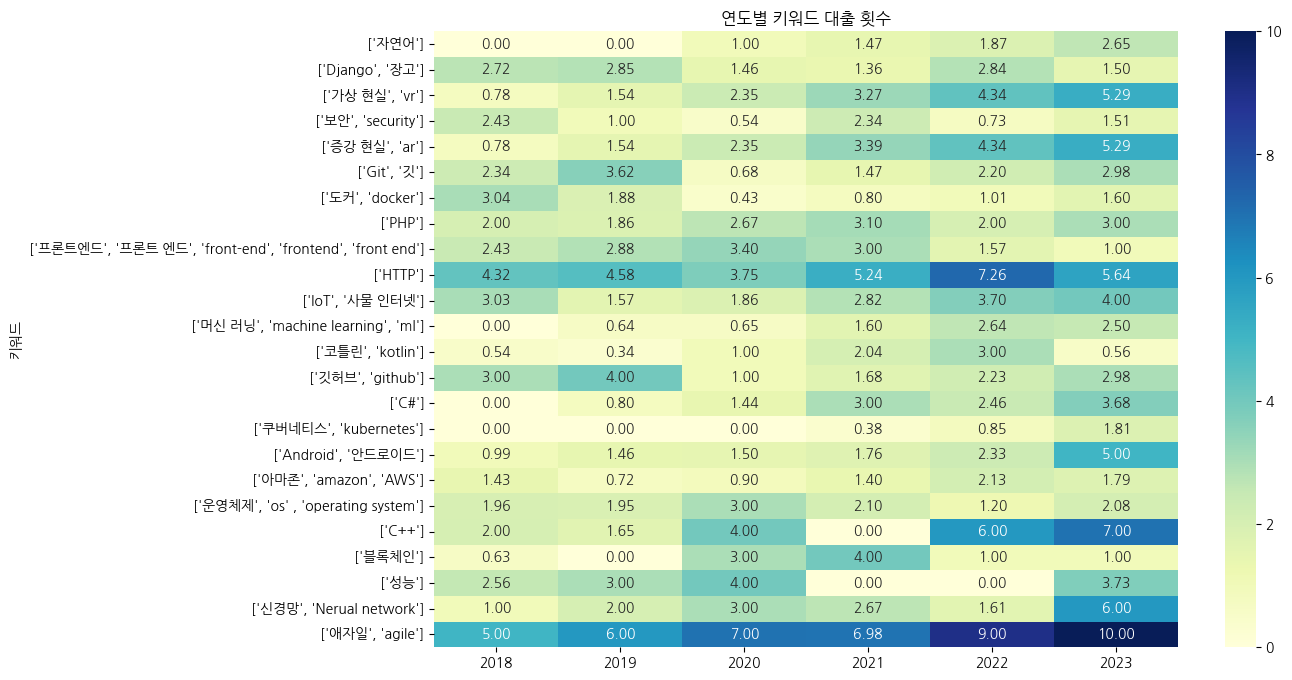

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
file_path = "/content/drive/MyDrive/대출 데이터 모음/당해년도-출판년도 폴더/최신 데이터 민감도_결과_25~50.xlsx"
df = pd.read_excel(file_path, index_col="키워드")

plt.figure(figsize=(12, 8))
# vmax 값을 설정하여 범위를 조정함
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('연도별 키워드 대출 횟수')
plt.show()

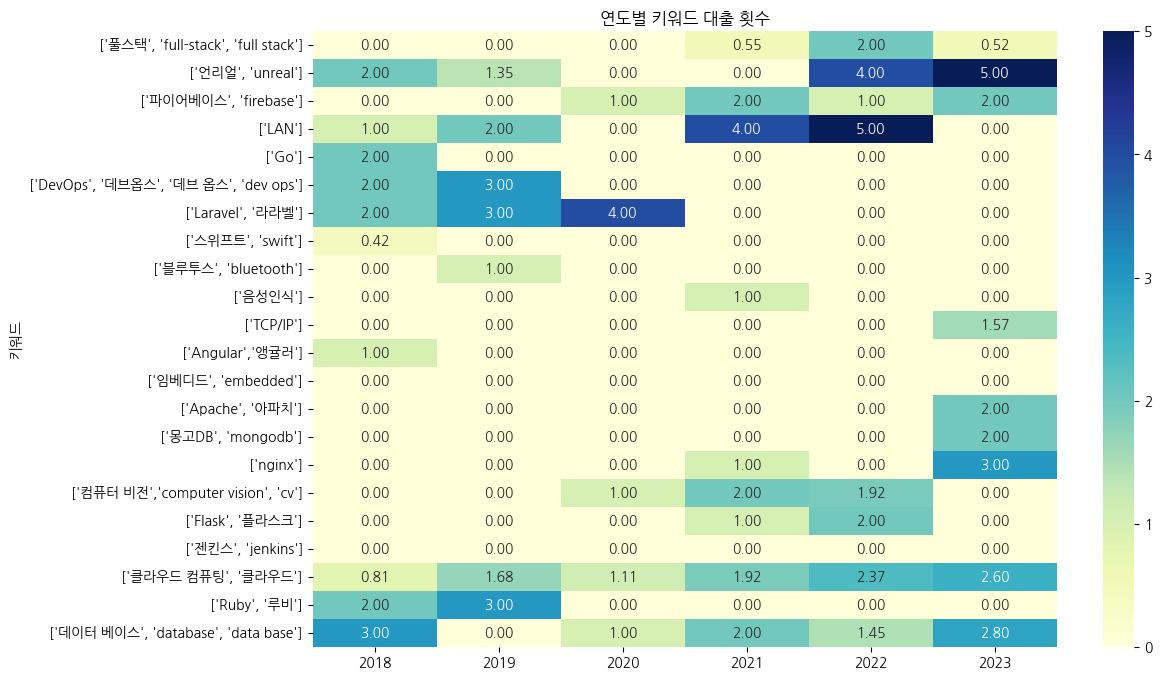

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
file_path = "/content/drive/MyDrive/대출 데이터 모음/당해년도-출판년도 폴더/최신 데이터 민감도_결과_51~70.xlsx"
df = pd.read_excel(file_path, index_col="키워드")

plt.figure(figsize=(12, 8))
# vmax 값을 설정하여 범위를 조정함
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('연도별 키워드 대출 횟수')
plt.show()